In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/winequality-red.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [5]:
X = df.drop('quality', axis=1)

# Target variable (dependent variable)
y = df['quality']

In [6]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the splits
print(f'Training set shape: {X_train.shape}')
print(f'Test set shape: {X_test.shape}')

Training set shape: (1279, 11)
Test set shape: (320, 11)


In [7]:
# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [8]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [9]:
# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 55.94%
Confusion Matrix:
[[ 0  0  0  1  0  0]
 [ 0  0  5  5  0  0]
 [ 1  4 88 35  2  0]
 [ 0  3 40 70 17  2]
 [ 0  1  5 14 21  1]
 [ 0  0  1  3  1  0]]
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.63      0.68      0.65       130
           6       0.55      0.53      0.54       132
           7       0.51      0.50      0.51        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.28      0.28      0.28       320
weighted avg       0.55      0.56      0.55       320



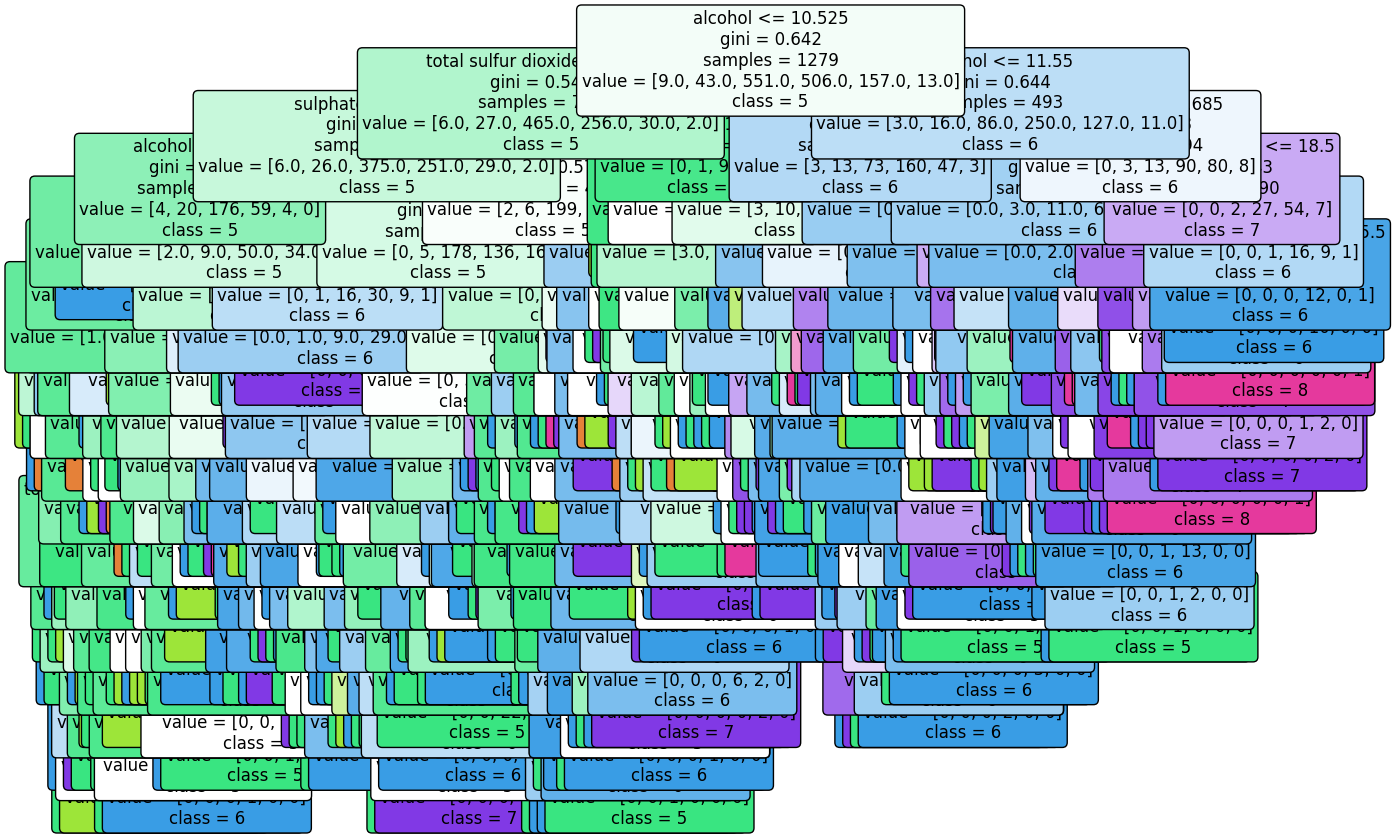

In [10]:
from sklearn.tree import plot_tree

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=[str(i) for i in clf.classes_], rounded=True, fontsize=12)
plt.show()

In [11]:
# Hyperparameter tuning (optional)
clf_tuned = DecisionTreeClassifier(max_depth=5, random_state=42)  # Example: limiting tree depth
clf_tuned.fit(X_train, y_train)

# Make predictions with the tuned model
y_pred_tuned = clf_tuned.predict(X_test)

# Accuracy of the tuned model
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f'Accuracy of Tuned Model: {accuracy_tuned * 100:.2f}%')

Accuracy of Tuned Model: 55.94%
